In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [2]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Dropping the redundant Index column (Unnamed: 0)

In [3]:
boston_df.drop('Unnamed: 0', axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Boxplot for "Median value of owner-occupied homes" (MEDV)

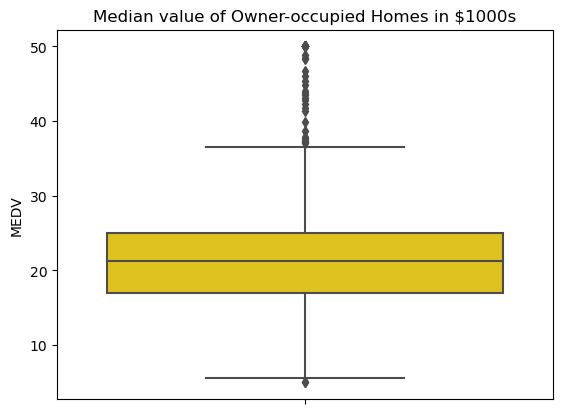

In [4]:
sns.boxplot(data = boston_df, y = 'MEDV', color = 'gold').set(title = 'Median value of Owner-occupied Homes in $1000s')
plt.show()

### Barplot for the Charles river variable(CHAS)

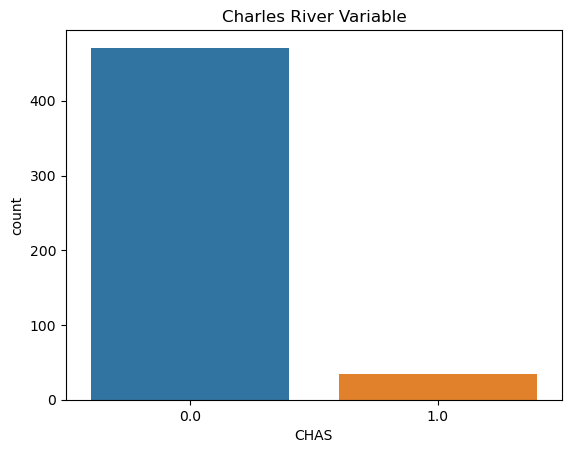

In [5]:
sns.countplot(data = boston_df, x = 'CHAS').set(title = 'Charles River Variable')
plt.show()

### Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

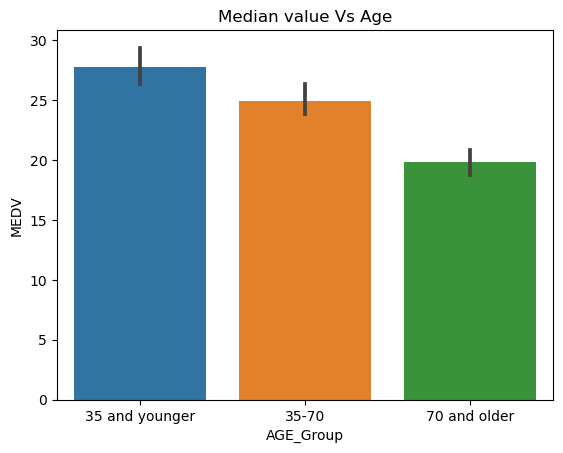

In [6]:
bins = [-1, 35, 70, float('inf')]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
sns.barplot(data = boston_df, x = 'AGE_Group', y = 'MEDV').set(title = 'Median value Vs Age')
plt.show()

### Scatterplot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

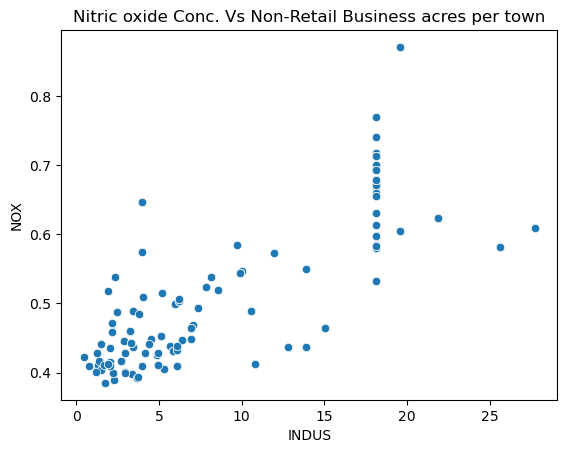

In [7]:
sns.scatterplot(data = boston_df, y = 'NOX', x = 'INDUS').set(title = 'Nitric oxide Conc. Vs Non-Retail Business acres per town')
plt.show()

#### The relationship is approximately linear

### Histogram for the pupil to teacher ratio variable

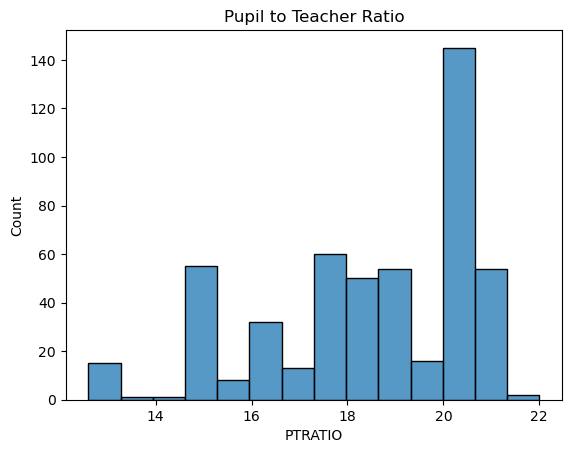

In [8]:
sns.histplot(data = boston_df, x = 'PTRATIO').set(title = 'Pupil to Teacher Ratio')
plt.show()

### Finding if there is a significant difference in median value of houses bounded by the Charles river or not. (T-test for independent samples)

In [9]:
print("Null hypothesis: There is a significant difference in median values.")
print("Alternate hypothesis: There isn't any significant difference in median values.\n")

medv_charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(medv_charles_river, medv_no_charles_river)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values.")


Null hypothesis: There is a significant difference in median values.
Alternate hypothesis: There isn't any significant difference in median values.

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median values.


### Finding if there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [10]:
print("Null hypothesis: There is a significant difference in median values across the age groups.")
print("Alternate hypothesis: There isn't any significant difference in median values across the age groups.\n")


bins = [0, 30, 70, 100]
labels = ['Low proportion', 'Medium proportion', 'High proportion']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

grouped_data = [group['MEDV'].values for name, group in boston_df.groupby('AGE_Group')]

f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values across the age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values across the age groups.")

Null hypothesis: There is a significant difference in median values across the age groups.
Alternate hypothesis: There isn't any significant difference in median values across the age groups.

F-statistic: 34.249179272635395
P-value: 1.135217093487225e-14
Reject the null hypothesis: There is a significant difference in median values across the age groups.


### Analyzing the relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [11]:
print("Null hypothesis: There is a significant relationship between NOX and INDUS.")
print("Alternate hypothesis: There isn't any significant relationship between NOX and INDUS.\n")

nox = boston_df['NOX']
indus = boston_df['INDUS']

correlation_coefficient, p_value = pearsonr(nox, indus)

print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")

Null hypothesis: There is a significant relationship between NOX and INDUS.
Alternate hypothesis: There isn't any significant relationship between NOX and INDUS.

Pearson Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


### Analysing the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [12]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        21:07:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0